# 1. Tokenizer 

In [12]:
import torch
import re

In [13]:
with open("data/the-verdict.txt", "r", encoding = "utf-8") as file:
    raw = file.read()
print("Number of characters:", len(raw))
print(raw[:100])

Number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


### Tokenize it

In [14]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
len(preprocessed)

4690

In [15]:
preprocessed[:10]

['I',
 'HAD',
 'always',
 'thought',
 'Jack',
 'Gisburn',
 'rather',
 'a',
 'cheap',
 'genius']

### Tokens to token IDs

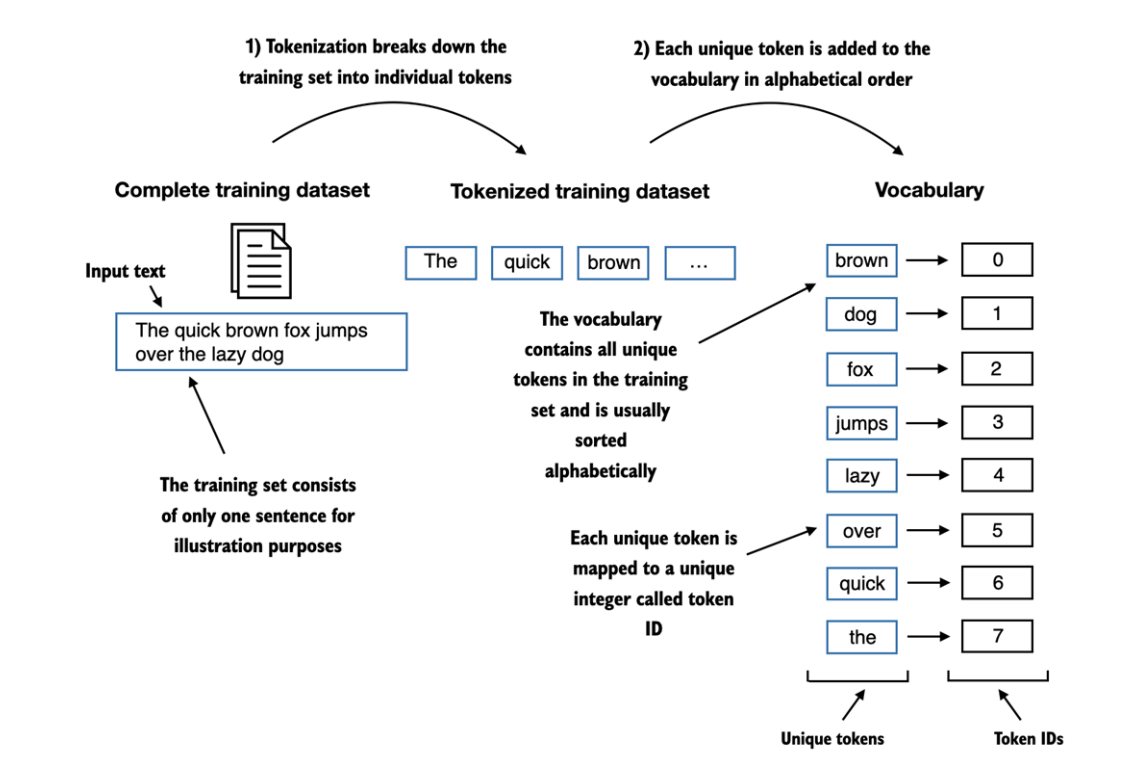

In [16]:
words = sorted(set(preprocessed))
vocab_size = len(words)
vocab_size

1130

## Simple tokenizer

In [17]:
vocab = { token : index for index, token in enumerate(words)}
vocab

{'!': 0,
 '"': 1,
 "'": 2,
 '(': 3,
 ')': 4,
 ',': 5,
 '--': 6,
 '.': 7,
 ':': 8,
 ';': 9,
 '?': 10,
 'A': 11,
 'Ah': 12,
 'Among': 13,
 'And': 14,
 'Are': 15,
 'Arrt': 16,
 'As': 17,
 'At': 18,
 'Be': 19,
 'Begin': 20,
 'Burlington': 21,
 'But': 22,
 'By': 23,
 'Carlo': 24,
 'Chicago': 25,
 'Claude': 26,
 'Come': 27,
 'Croft': 28,
 'Destroyed': 29,
 'Devonshire': 30,
 'Don': 31,
 'Dubarry': 32,
 'Emperors': 33,
 'Florence': 34,
 'For': 35,
 'Gallery': 36,
 'Gideon': 37,
 'Gisburn': 38,
 'Gisburns': 39,
 'Grafton': 40,
 'Greek': 41,
 'Grindle': 42,
 'Grindles': 43,
 'HAD': 44,
 'Had': 45,
 'Hang': 46,
 'Has': 47,
 'He': 48,
 'Her': 49,
 'Hermia': 50,
 'His': 51,
 'How': 52,
 'I': 53,
 'If': 54,
 'In': 55,
 'It': 56,
 'Jack': 57,
 'Jove': 58,
 'Just': 59,
 'Lord': 60,
 'Made': 61,
 'Miss': 62,
 'Money': 63,
 'Monte': 64,
 'Moon-dancers': 65,
 'Mr': 66,
 'Mrs': 67,
 'My': 68,
 'Never': 69,
 'No': 70,
 'Now': 71,
 'Nutley': 72,
 'Of': 73,
 'Oh': 74,
 'On': 75,
 'Once': 76,
 'Only': 77,
 '

In [18]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: s for i,s in enumerate(vocab)}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[word] for word in preprocessed]
        return ids
    
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text 
        


This line uses **regular expressions** to **remove unnecessary spaces before punctuation marks**.

Here’s the breakdown:

```python
text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
```

### 🔍 What the regex means

* **`re.sub(pattern, replacement, text)`**
  → Replace all matches of `pattern` with `replacement` in `text`.

* **`r'\s+([,.?!"()\'])'`**
  This pattern matches:

  * `\s+` → one or more whitespace characters (spaces, tabs, newlines)
  * `([,.?!"()'])` → followed by **one punctuation mark** inside the brackets
    Characters included:
    `, . ? ! " ( ) '`

* The parentheses `( )` form **a capturing group** so we can reinsert the punctuation mark later.

* **`r'\1'`**
  → Replace the whole match with **the punctuation mark only**, removing the spaces before it.

### ✔️ Example

```python
input:  "Hello , world ! How are you ?"
output: "Hello, world! How are you?"
```

Spaces before `, ! ?` are removed.

### Summary

➡️ **This code cleans text by fixing spacing before punctuation** — a common step in NLP preprocessing.


In [19]:
tokenizer = SimpleTokenizerV1(vocab= vocab)
text = """"It's the last he painted, you know," Mrs. Gisburn said with pardonable
pride.""".strip()

ids = tokenizer.encode(text)

print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [20]:
text = tokenizer.decode(ids)
text

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

What if there's a word not in vocab appear?

In [21]:
# text = "Hello, do you like milk?"
# print(tokenizer.encode(text))

There's is no "hello" in our vocab

## A new version of simple tokenizer


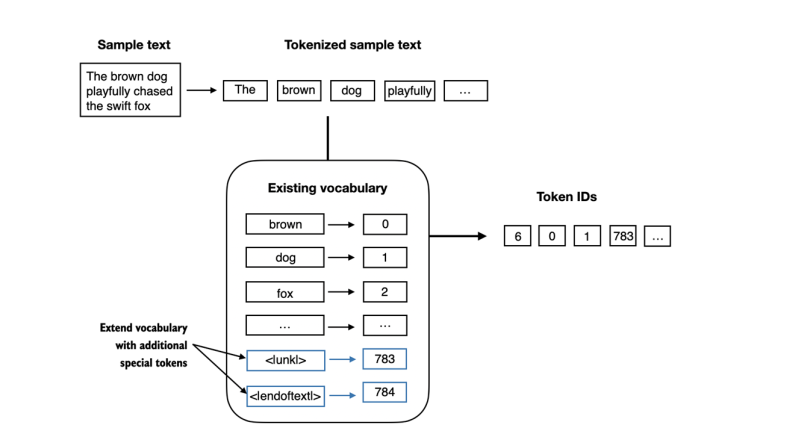

-> extend vocabulary with additional special tokens

In [22]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token : integer  for integer, token in enumerate(all_tokens)}

len(vocab.items())

1132

In [23]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


### A simple text tokenizer that handles unknown words

In [24]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s, i in vocab.items()}
    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [item if item in self.str_to_int else "<|unk|>" for item in preprocessed]

        ids = [self.str_to_int[s] for s in  preprocessed]
        return ids
    

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?"()\'])', r'\1', text)
        return text


In [25]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [26]:
tokenizer = SimpleTokenizerV2(vocab)
ids = tokenizer.encode(text)
ids

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [27]:
tokenizer.decode(ids)

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

### Byte pair encoding

In [28]:
from importlib.metadata import version

import tiktoken 
print("titoken version:", version("tiktoken"))

titoken version: 0.12.0


In [29]:
tokenizer = tiktoken.get_encoding("gpt2")

text = "Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace."
integers = tokenizer.encode(text= text, allowed_special= {"<|endoftext|>"})

In [30]:
integers

[15496,
 11,
 466,
 345,
 588,
 8887,
 30,
 220,
 50256,
 554,
 262,
 4252,
 18250,
 8812,
 2114,
 286,
 617,
 34680,
 27271,
 13]

In [31]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace.


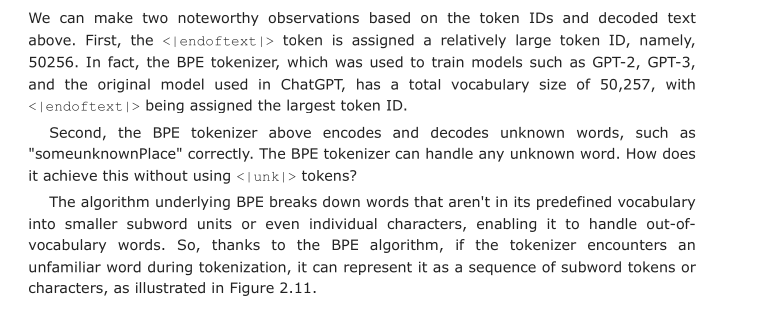

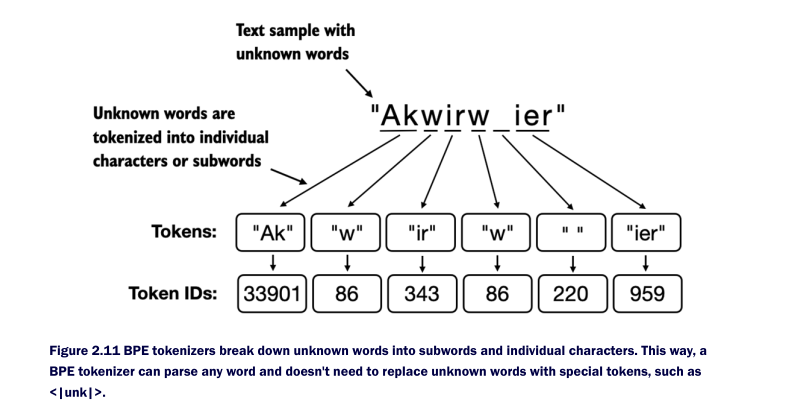

In [32]:
text = "Akwirw ier"
ids = tokenizer.encode(text)
ids


[33901, 86, 343, 86, 220, 959]

In [33]:
tokenizer.decode(ids)

'Akwirw ier'

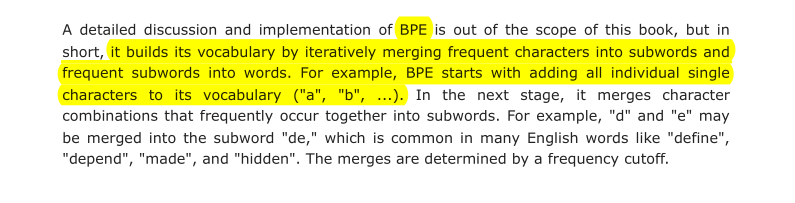

## Data sampling with a sliding window

In [34]:
with open("data/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()     
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [35]:
enc_sample = enc_text[50:]

In [36]:
context_size = 4
x = enc_sample[: context_size]
y = enc_sample[1: context_size + 1]
print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [37]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [38]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


### A dataset for batched inputs and targets

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader 

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        super().__init__()
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i: i + max_length]
            target_chunk = token_ids[i + 1 : i + max_length + 1]

            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, index):
        return self.input_ids[index], self.target_ids[index] 

In [40]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    
    dataloader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=shuffle,
    drop_last=drop_last,
    num_workers=0 # The number of CPU processes to use for preprocessing
    )
    return dataloader

In [41]:
with open("data/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length= 4, stride=1, shuffle=False)

data_iter = iter(dataloader)

first_batch = next(data_iter)
first_batch

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]

In [42]:
next(data_iter) # second batch

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]

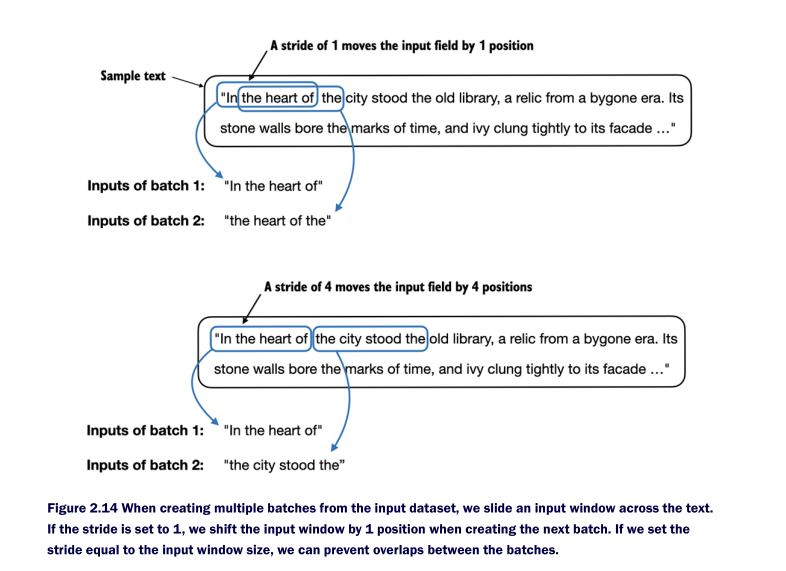

In [43]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[ 3436,    11,   290,  1645],
        [30050,   503,    13,   366],
        [  607,   898,  4286,   438],
        [   64,   520,  5493,  2474],
        [   11,  8759,  2763,    11],
        [  257,  1178,  2745,     6],
        [  373,   655,   780,   673],
        [  284,   475,   644,   530]])

Targets:
 tensor([[   11,   290,  1645,  1752],
        [  503,    13,   366,  2215],
        [  898,  4286,   438, 18108],
        [  520,  5493,  2474,   314],
        [ 8759,  2763,    11,   351],
        [ 1178,  2745,     6,  4686],
        [  655,   780,   673,   373],
        [  475,   644,   530,   460]])


## Creating token embeddings

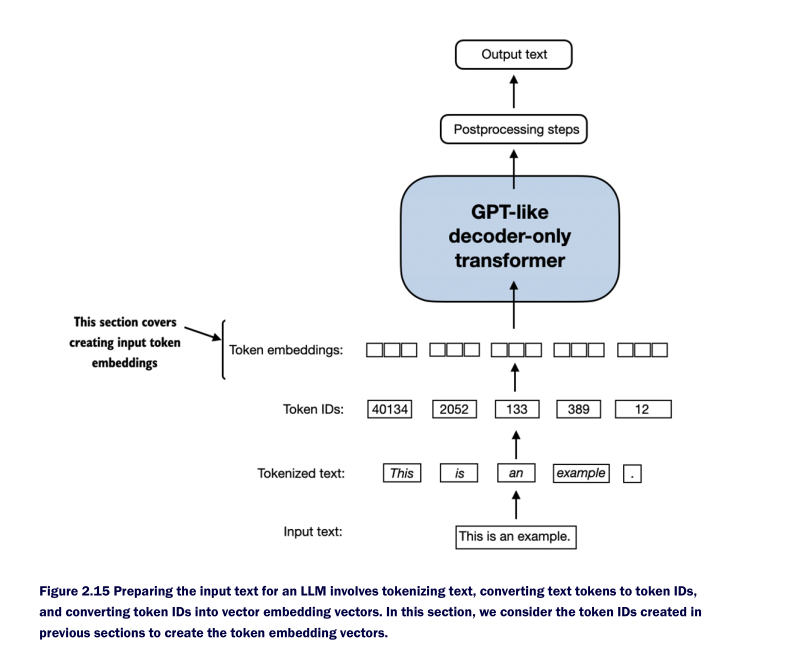

In [44]:
input_ids = torch.tensor([2, 3, 5, 1])

In [45]:
vocab_size = 6
output_dim = 3

In [46]:
torch.manual_seed(42)

embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 1.9269,  1.4873, -0.4974],
        [ 0.4396, -0.7581,  1.0783],
        [ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [-0.2316,  0.0418, -0.2516],
        [ 0.8599, -0.3097, -0.3957]], requires_grad=True)


In [47]:
embedding_layer(torch.tensor(3)) # return the 3th rows in embeddings layer (so maybe the input 3 is the index)

tensor([-0.6866,  0.6105,  1.3347], grad_fn=<EmbeddingBackward0>)

In [48]:
embedding_layer(torch.tensor(0))

tensor([ 1.9269,  1.4873, -0.4974], grad_fn=<EmbeddingBackward0>)

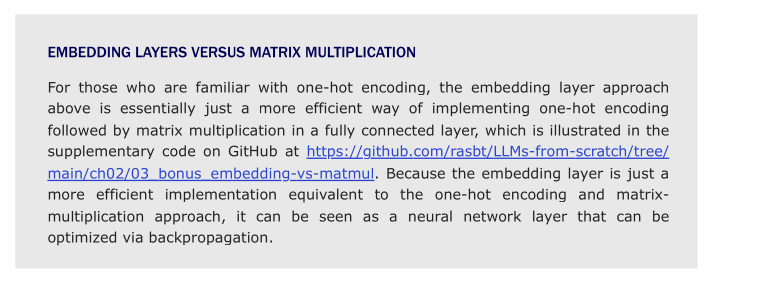

In [49]:
embedding_layer(input_ids)

tensor([[ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [ 0.8599, -0.3097, -0.3957],
        [ 0.4396, -0.7581,  1.0783]], grad_fn=<EmbeddingBackward0>)

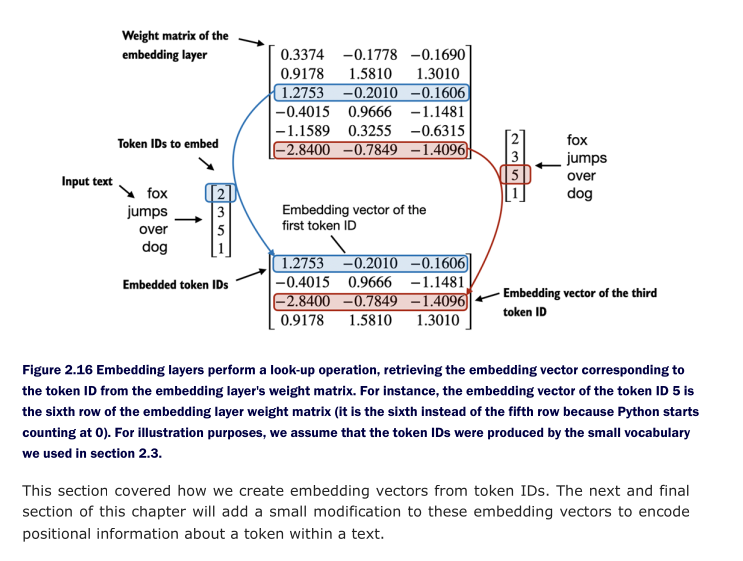

## Encoding word positions

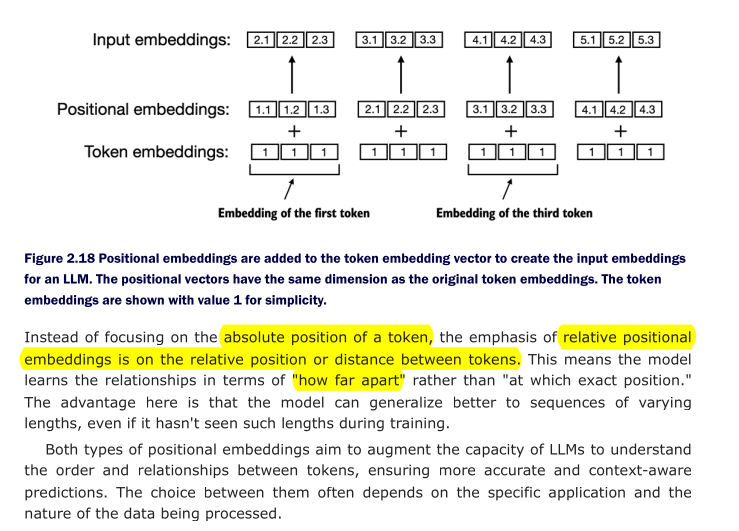

In [50]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [51]:
max_length = 4

dataloader = create_dataloader_v1(
raw_text, batch_size=8, max_length=max_length, stride=max_length, shuffle=False)

data_iter = iter(dataloader)

inputs, targets = next(data_iter)

print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [52]:
token_embeddings = token_embedding_layer(inputs)
token_embeddings.shape

torch.Size([8, 4, 256])

In [53]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length)) #TODO: This is fixed size, cannot learn in long context
print(pos_embeddings.shape)

torch.Size([4, 256])


In [54]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


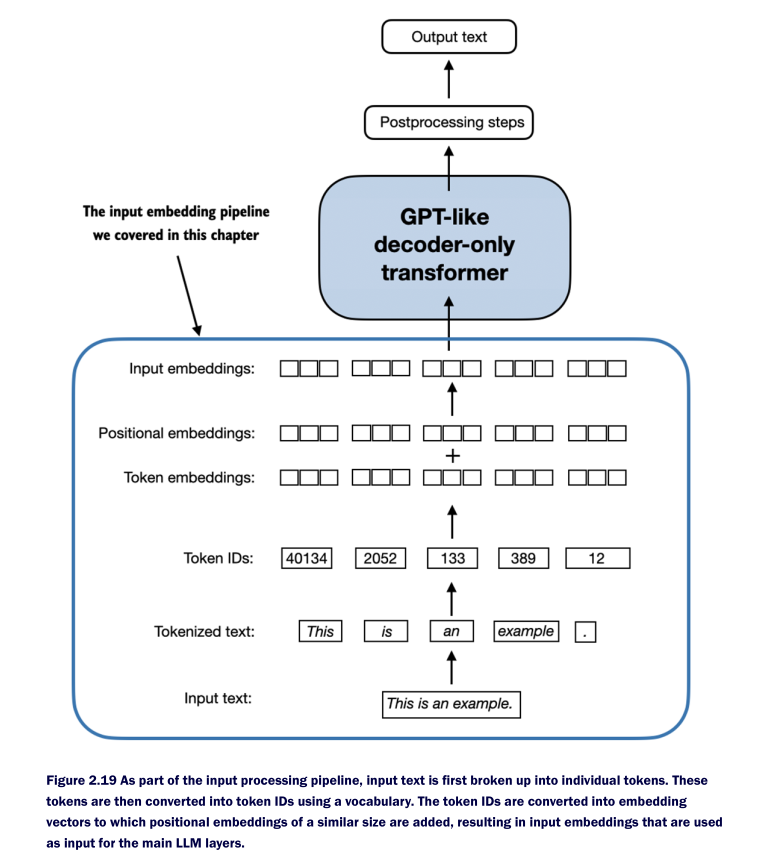

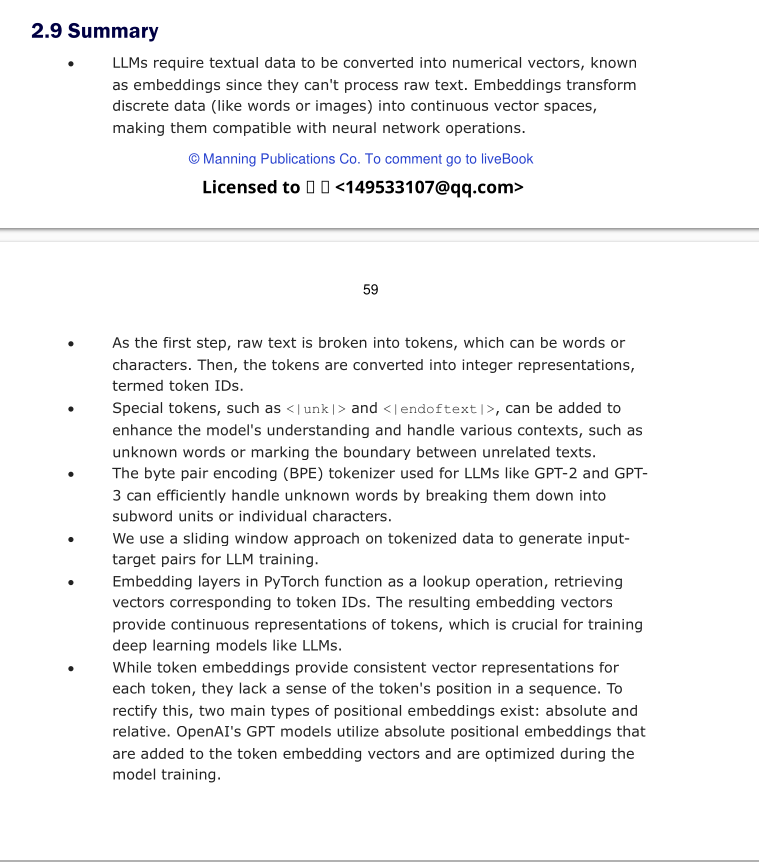

# 2. Coding Attention Mechanisms

### 2.1 The problem with modeling long sequences (without attention)

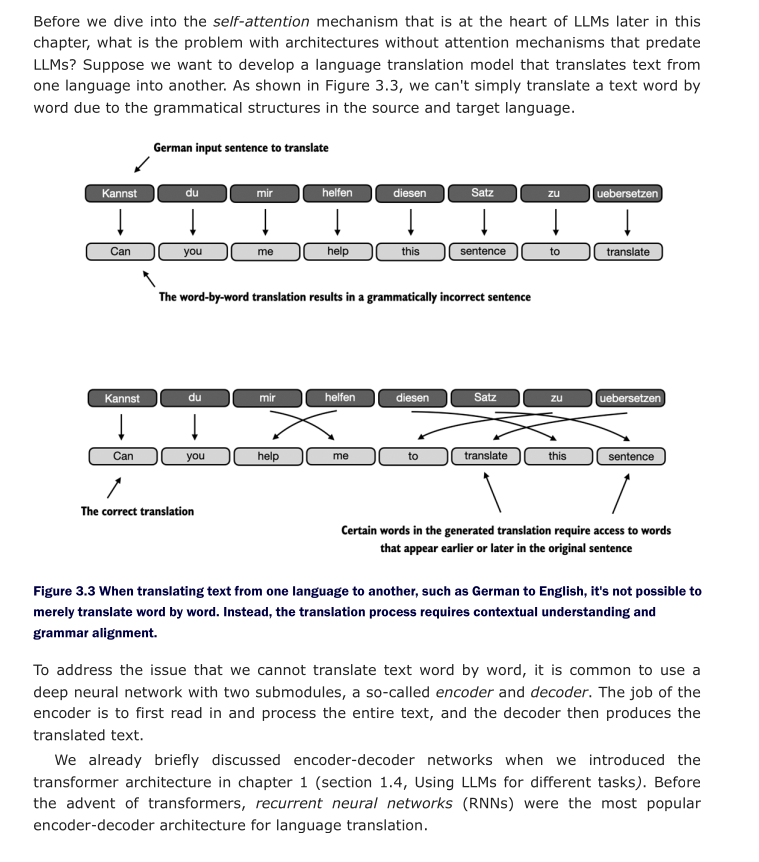


### Attending to different parts of the input with self-attention

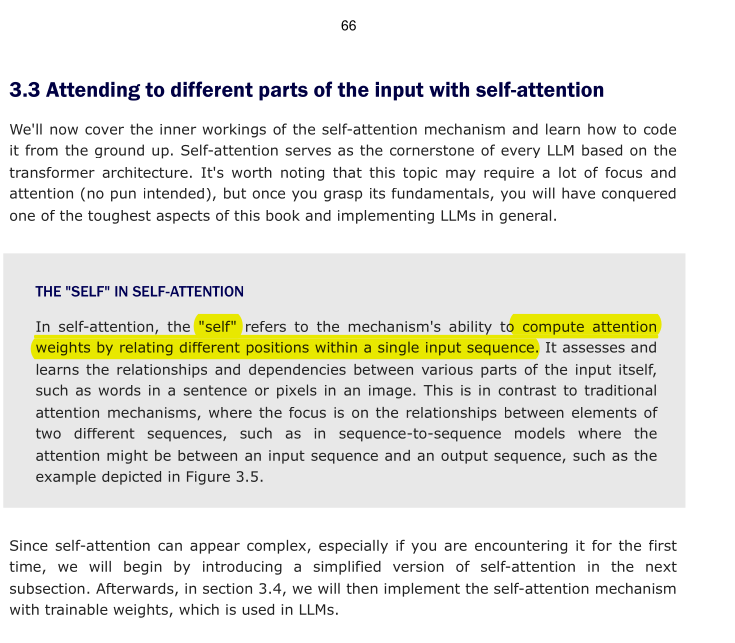

In this section, we implement a simplified variant of self-attention, free from any trainable
weights, which is summarized in Figure 3.7. The goal of this section is to illustrate a few
key concepts in self-attention before adding trainable weights next in section 3.4.

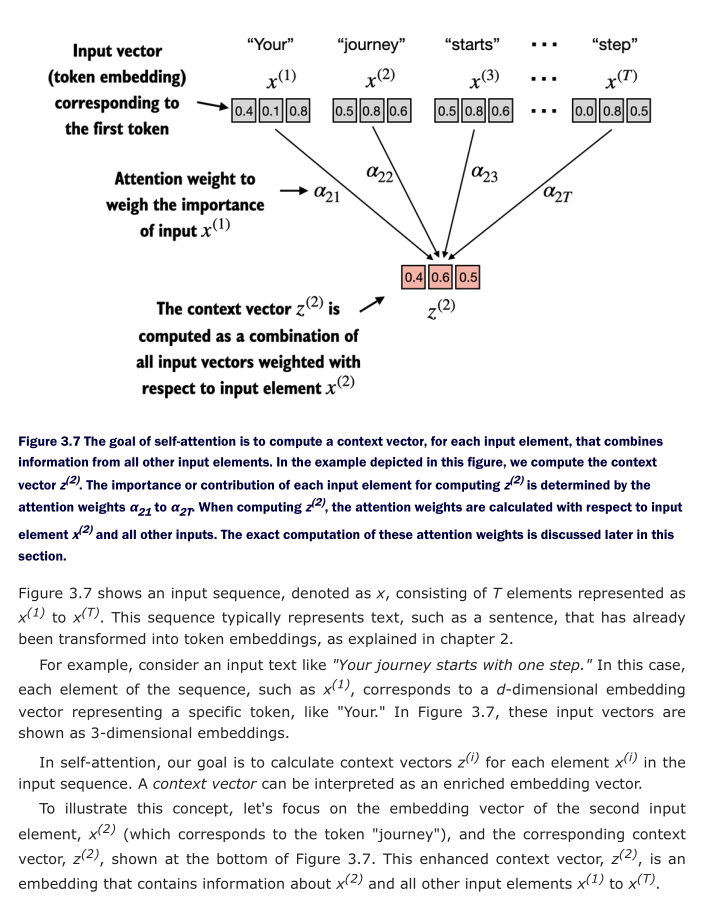

In self-attention, context vectors play a crucial role. Their purpose is to create enriched
representations of each element in an input sequence (like a sentence) by incorporating
information from all other elements in the sequence, as illustrated in Figure 3.7. This is
essential in LLMs, which need to understand the relationship and relevance of words in a
sentence to each other. Later, we will add trainable weights that help an LLM learn to
construct these context vectors so that they are relevant for the LLM to generate the next
token.

In [55]:
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your(x^1)
[0.55, 0.87, 0.66], # journey(x^2)
[0.57, 0.85, 0.64], # starts(x^3)
[0.22, 0.58, 0.33], # with(x^4)
[0.77, 0.25, 0.10], # one(x^5)
[0.05, 0.80, 0.55]] # step(x^6)
)

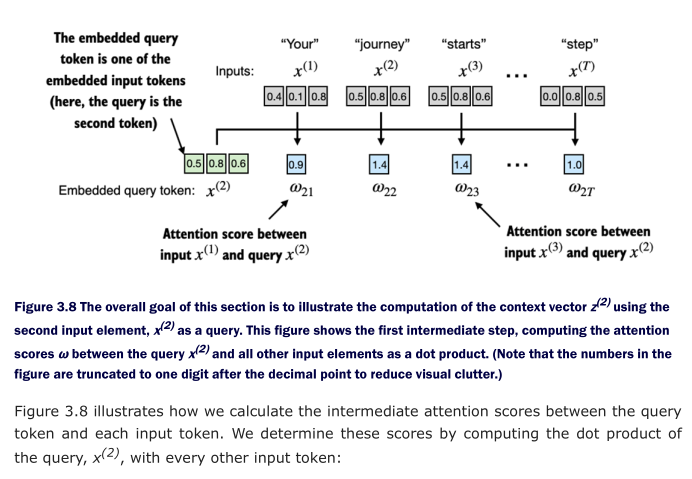

In [56]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0]) #number of rows (scores of all token in the sequence)
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


#### Understand dot product
A dot product is essentially just a concise way of multiplying two vectors element-wise and then summing the products, which we can demonstrate as follows

In [57]:
res = 0.
for idx, element in enumerate(inputs[0]):
    res += inputs[0][idx] * query[idx]
print(res)
print(torch.dot(inputs[0], query))

tensor(0.9544)
tensor(0.9544)


Beyond viewing the dot product operation as a mathematical tool that combines two
vectors to yield a scalar value, the dot product is a measure of similarity because it
quantifies how much two vectors are aligned: a higher dot product indicates a
greater degree of alignment or similarity between the vectors. In the context of self-
attention mechanisms, the dot product determines the extent to which elements in a
sequence attend to each other: the higher the dot product, the higher the similarity
and attention score between two elements.

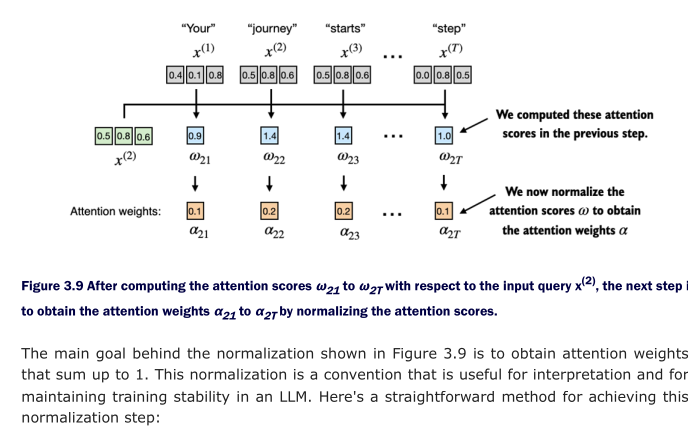

In [58]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [59]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)
attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


Note that this naive softmax implementation (softmax_naive) **may encounter numerical
instability problems**, such as overflow and underflow, when dealing with large or small input
values. Therefore, in practice, it's advisable to use the PyTorch implementation of softmax,
which has been extensively optimized for performance:

In [60]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0) #TODO: Why should not use naive softmax
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


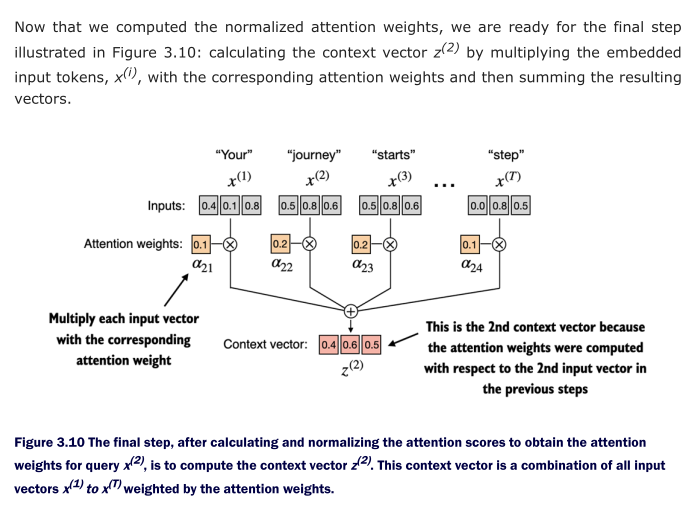

In [61]:
query = inputs[1] # 2nd input token is the query
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


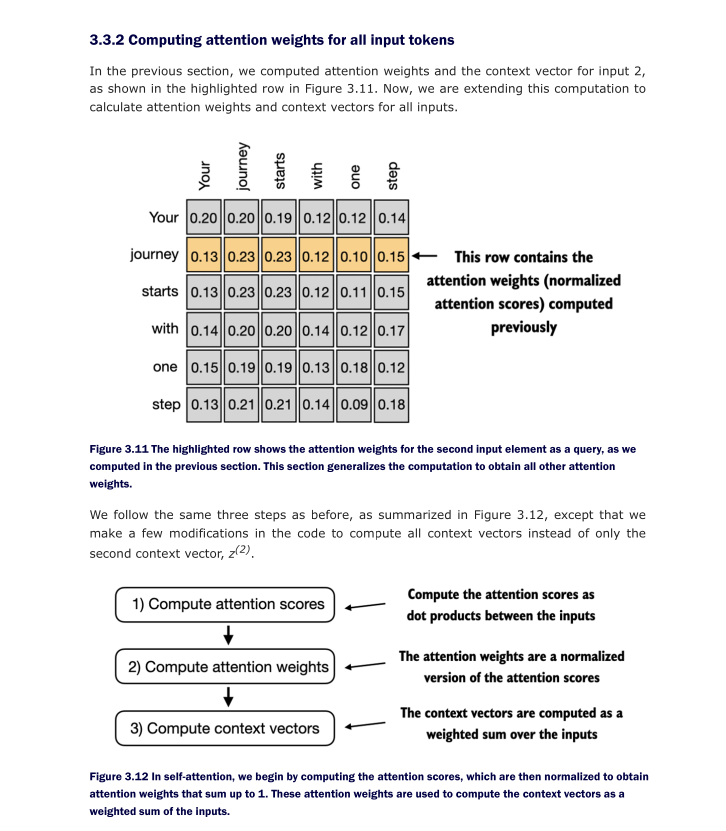

In [62]:
attn_scores = torch.empty(6,6)
for i, x_i in enumerate(inputs):
    for j, x_j  in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [63]:
attn_scores = inputs @ inputs.T # Can use matrix miltiplication
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [64]:
attn_weights = torch.softmax(attn_scores, dim=-1)
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [65]:
attn_weights.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [66]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [67]:
all_context_vecs = attn_weights @ inputs
all_context_vecs

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

### Implementing self-attention with trainable weights

In [68]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [69]:
torch.manual_seed(123)

W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

Note that we are setting requires_grad=False to reduce clutter in the outputs for
illustration purposes, but if we were to use the weight matrices for model training, we
would set `requires_grad=True` to update these matrices during model training.

In [70]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


#### Get key and value vector

In [71]:
keys = inputs @ W_key
values = inputs @ W_value 
print(f"keys.shape: {keys.shape}")
print(f"values.shape: {values.shape}")


keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [72]:
inputs.shape

torch.Size([6, 3])

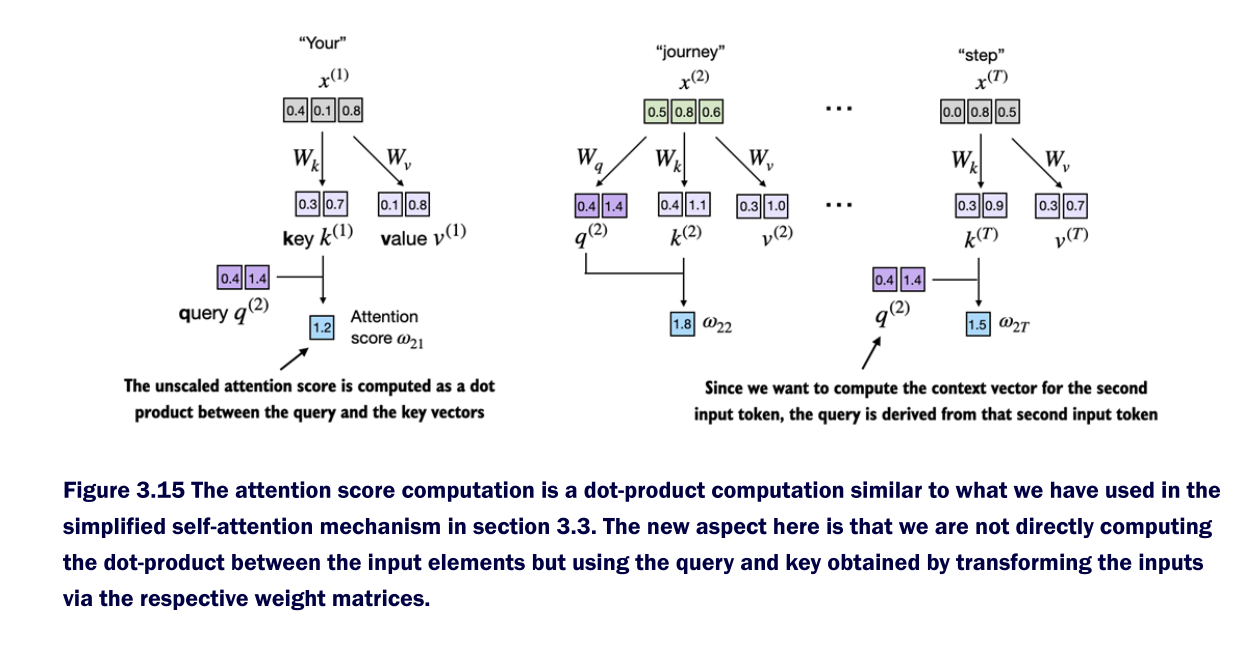

#### Compute attention score

In [74]:
keys

tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])

In [73]:
keys_2 = keys[1]
attn_scores_22 = query_2.dot(keys_2)
print(attn_scores_22)

tensor(1.8524)


In [76]:
query_2

tensor([0.4306, 1.4551])

In [77]:
attn_scores_2 = query_2 @ keys.T 
attn_scores_2

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])

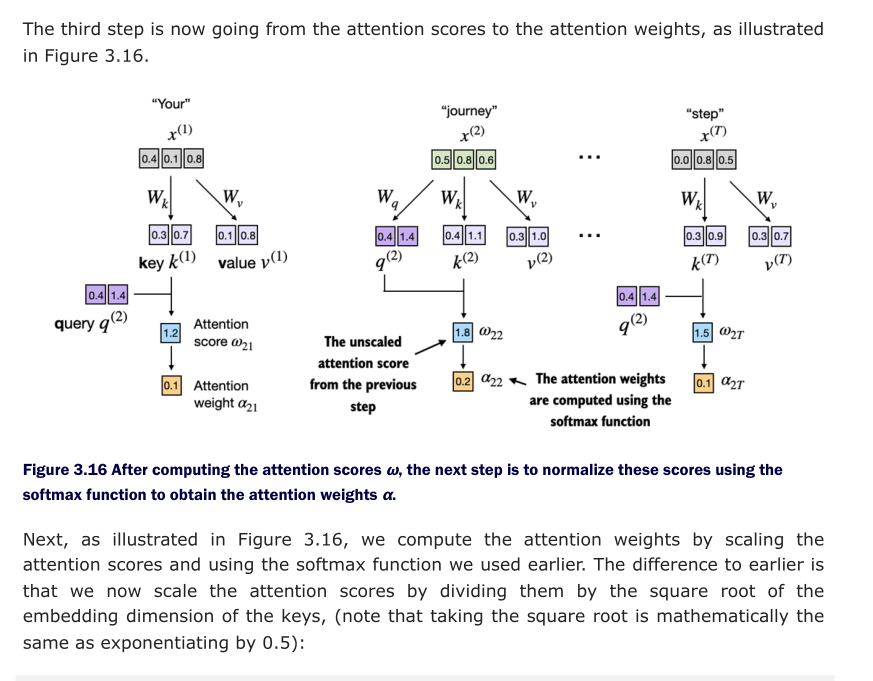

In [78]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


#### THE RATIONALE BEHIND SCALED-DOT PRODUCT ATTENTION

The reason for the normalization by the embedding dimension size is to improve the
training performance by avoiding small gradients. For instance, when scaling up the
embedding dimension, which is typically greater than thousand for GPT-like LLMs,
large dot products can result in very small gradients during backpropagation due to
the softmax function applied to them. As dot products increase, the softmax function
behaves more like a step function, resulting in gradients nearing zero. These small
gradients can drastically slow down learning or cause training to stagnate.
The scaling by the square root of the embedding dimension is the reason why this
self-attention mechanism is also called scaled-dot product attention.

#TODO: Read this

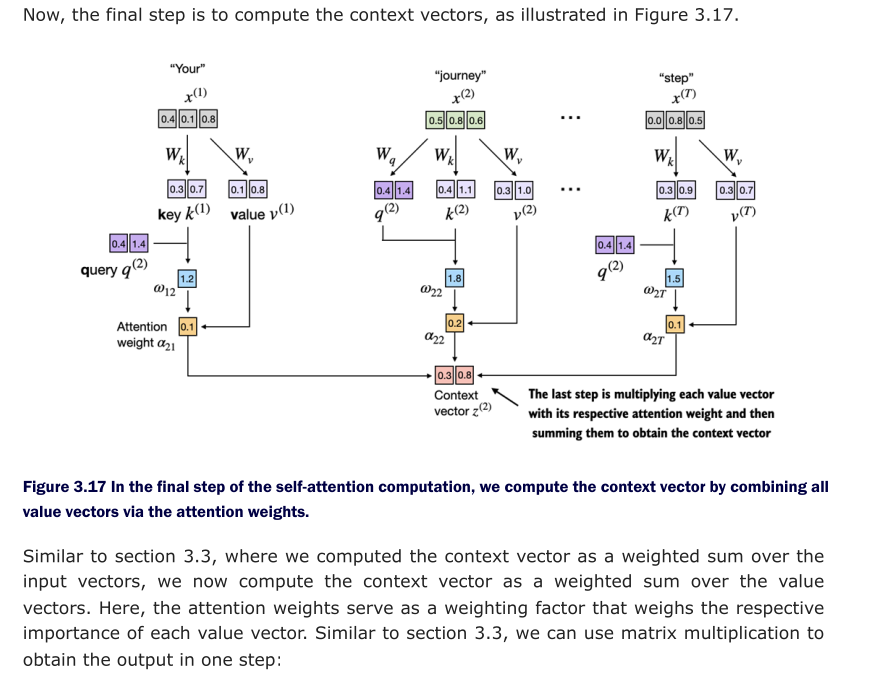

In [79]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


#### WHY QUERY, KEY, AND VALUE?

The terms "key," "query," and "value" in the context of attention mechanisms are
borrowed from the domain of information retrieval and databases, where similar
concepts are used to store, search, and retrieve information.


A "query" is analogous to a search query in a database. It represents the current
item (e.g., a word or token in a sentence) the model focuses on or tries to
understand. The query is used to probe the other parts of the input sequence to
determine how much attention to pay to them.


The "key" is like a database key used for indexing and searching. In the attention
mechanism, each item in the input sequence (e.g., each word in a sentence) has an
associated key. These keys are used to match with the query.


The "value" in this context is similar to the value in a key-value pair in a database. It
represents the actual content or representation of the input items. Once the model
determines which keys (and thus which parts of the input) are most relevant to the
query (the current focus item), it retrieves the corresponding values.

In [ ]:
import torch.nn as nn 
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    def forward(self, x):
        keys = x @ self.W_key
        values = x @ self.W_value # 6x2
        queries = x @ self.W_query 

        attn_scores = queries @ keys.T # 6 x 6 
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values # 6x6 @ 6x2 -> 6x2
        return context_vec

In [81]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


#### Self-Attention Summary

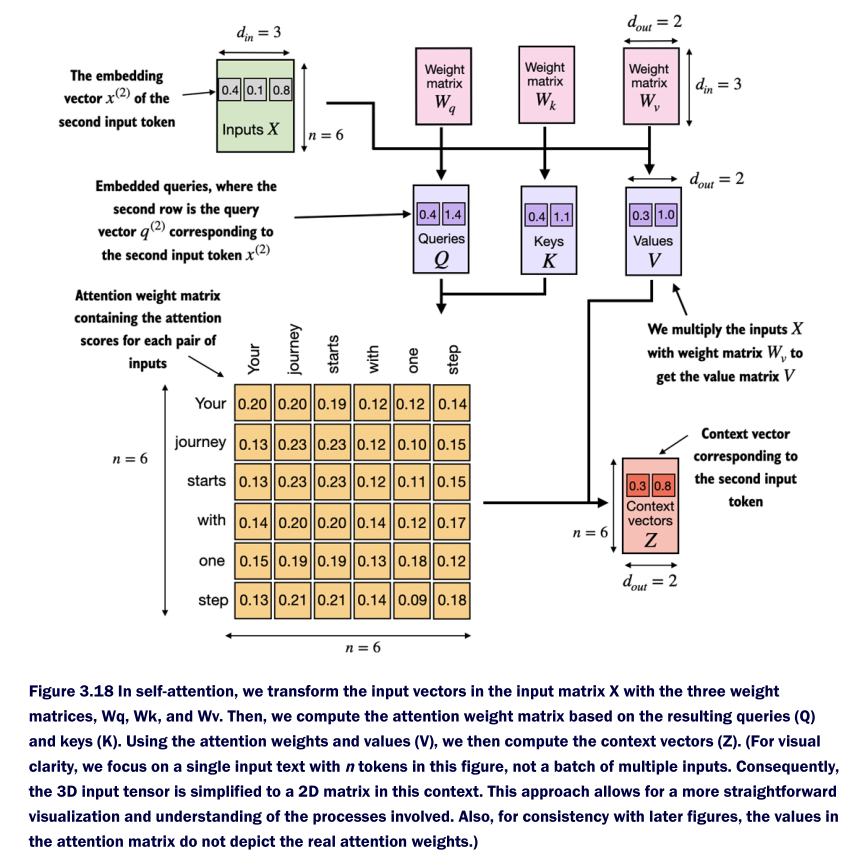

As shown in Figure 3.18, self-attention involves the trainable weight matrices Wq, Wk, and
Wv. These matrices transform input data into queries, keys, and values, which are crucial
components of the attention mechanism. As the model is exposed to more data during
training, it adjusts these trainable weights, as we will see in upcoming chapters.


We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's
nn.Linear layers, which effectively perform matrix multiplication when the bias units are
disabled. Additionally, a significant advantage of using nn.Linear instead of manually
implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight
initialization scheme, contributing to more stable and effective model training.

In [91]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, qkv_bias)
    
    def forward(self, x):
        queries = self.W_query(x)
        values = self.W_value(x)
        keys = self.W_key(x)

        attn_scores = queries @ keys.T 
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5 , dim=-1)
        context_vec = attn_weights @ values

        return context_vec


In [92]:
torch.manual_seed(789)

sa_v2 = SelfAttention_v2(d_in, d_out)
sa_v2

SelfAttention_v2(
  (W_query): Linear(in_features=3, out_features=2, bias=False)
  (W_key): Linear(in_features=3, out_features=2, bias=False)
  (W_value): Linear(in_features=3, out_features=2, bias=False)
)

In [93]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [94]:
sa_v2(inputs)

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)

### Hiding future words with causual attention

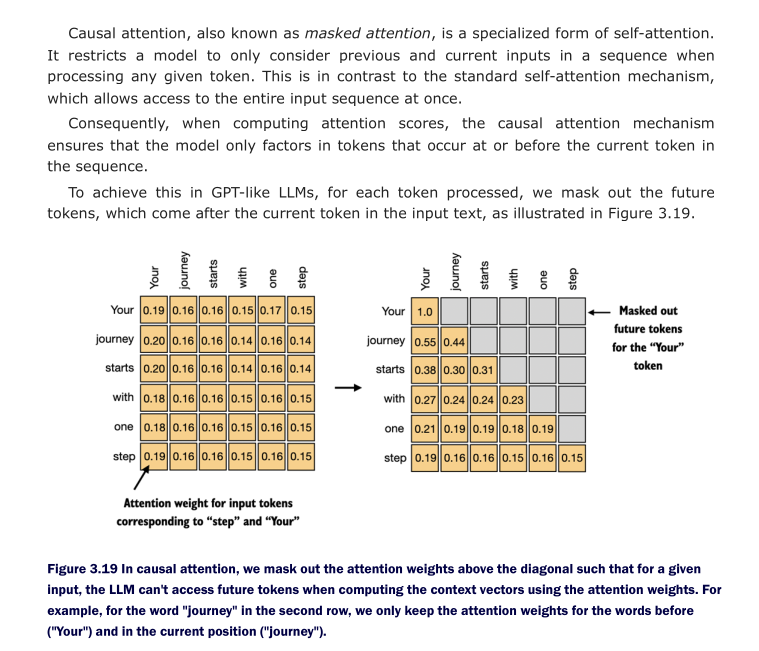

In [96]:
queries = sa_v2.W_query(inputs) 
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


We can implement step 2 in Figure 3.20 using PyTorch's tril function to create a mask
where the values above the diagonal are zero

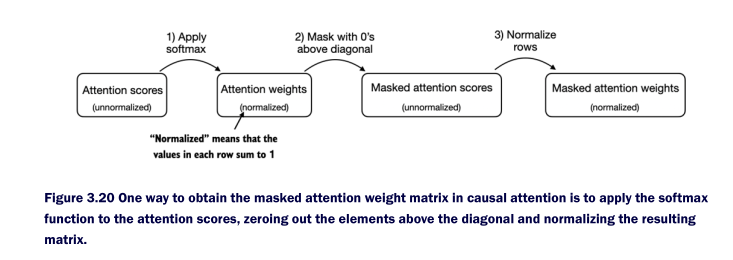

In [97]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [101]:
torch.tril(attn_weights)
# input is a tensor -> it make all the value above the diagonal zero

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<TrilBackward0>)

In [107]:
tmp = torch.full((10,5), 3)
tmp

tensor([[3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3]])

In [108]:
torch.tril(tmp)

tensor([[3, 0, 0, 0, 0],
        [3, 3, 0, 0, 0],
        [3, 3, 3, 0, 0],
        [3, 3, 3, 3, 0],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3]])

In [109]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [ ]:
row_sums = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm) #TODO: renormalize the attention weights to sum up to 1 again in each rows 


tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


#### Information leakage
When we apply a mask and then renormalize the attention weights, it might initially
appear that information from future tokens (which we intend to mask) could still
influence the current token because their values are part of the softmax calculation.
However, the key insight is that when we renormalize the attention weights after
masking, what we're essentially doing is recalculating the softmax over a smaller
subset (since masked positions don't contribute to the softmax value).


The mathematical elegance of softmax is that despite initially including all positions
in the denominator, after masking and renormalizing, the effect of the masked
positions is nullified — they don't contribute to the softmax score in any meaningful
way.


In simpler terms, after masking and renormalization, the distribution of attention
weights is as if it was calculated only among the unmasked positions to begin with.
This ensures there's no information leakage from future (or otherwise masked)
tokens as we intended.

In [111]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [123]:
torch.triu(torch.tensor(torch.randn(3,3)), diagonal=1).bool()

/tmp/ipykernel_51449/2315947715.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.triu(torch.tensor(torch.randn(3,3)), diagonal=1).bool()


tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [124]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


#### Masking additional attention weights with dropout